# Plotting wrapper

In [14]:
import uuid

def plot(x_data, y_data, plot_type="line", color="#007acc", alpha=1, xticks=None, grid=None, legenddata=None, legend=False, xlabel="", ylabel="", vertical_line_date=None):
    fig, ax = plt.subplots()
    fig.patch.set_facecolor('#0c1c23')

    if plot_type == "line":
        ax.plot(x_data, y_data, color=color, alpha=alpha, zorder=3)
    elif plot_type == "bar":
        ax.bar(x_data, y_data, color=color, alpha=alpha, zorder=3)
    elif plot_type == "scatter":
        ax.scatter(x_data, y_data, color=color, alpha=alpha, zorder=3)

    ax.set_facecolor('#122229')
    ax.spines['left'].set_color('#FFFFFF')
    ax.spines['left'].set_linewidth(0.5)

    ax.spines['bottom'].set_color("#3C494F")
    ax.spines['bottom'].set_linewidth(0.3)
    ax.spines['top'].set_color("#3C494F")
    ax.spines['top'].set_linewidth(0.3)
    ax.spines['right'].set_color("#3C494F")
    ax.spines['right'].set_linewidth(0.3)

    ax.tick_params(axis='both', colors='#FFFFFF')

    if xticks is not None:
        ax.set_xticklabels(xticks)

    if grid is not None:
        plt.grid(color="#3C494F", linestyle=grid, linewidth=0.3, zorder=0)

    plt.xticks(rotation=45, ha='right', color="white")
    plt.yticks(color="white")

    if vertical_line_date is not None:
        plt.axvline(x=vertical_line_date, label='Christmas', color="white", linestyle='--', alpha=0.75)

    plt.xlabel(xlabel, color="white", fontweight="bold", fontsize=10)
    plt.ylabel(ylabel, color="white", fontweight="bold", fontsize=10)

    if legend:
        plt.legend(legenddata)

    plt.savefig("{}.png".format(uuid.uuid4()), dpi=600)

    plt.tight_layout()
    plt.show()


def plots(x_data, y_datas, colors, plot_type="line", alpha=1, xticks=None, legend=False, legenddata=None, grid=None, xlabel="", ylabel="", vertical_line_date=None):
    assert len(colors) == len(y_datas)

    fig, ax = plt.subplots()
    fig.patch.set_facecolor('#0c1c23')

    if plot_type == "line":
        for idx, y_data in enumerate(y_datas):
            ax.plot(x_data, y_data, color=colors[idx], alpha=alpha)
    elif plot_type == "bar":
        for idx, y_data in enumerate(y_datas):
            ax.bar(x_data, y_data, color=colors[idx], alpha=alpha)
    elif plot_type == "scatter":
        for idx, y_data in enumerate(y_datas):
            ax.scatter(x_data, y_data, color=colors[idx], alpha=alpha)

    ax.set_facecolor('#122229')
    ax.spines['left'].set_color('#FFFFFF')
    ax.spines['left'].set_linewidth(0.5)

    ax.spines['bottom'].set_color("#3C494F")
    ax.spines['bottom'].set_linewidth(0.3)
    ax.spines['top'].set_color("#3C494F")
    ax.spines['top'].set_linewidth(0.3)
    ax.spines['right'].set_color("#3C494F")
    ax.spines['right'].set_linewidth(0.3)

    ax.tick_params(axis='both', colors='#FFFFFF')

    plt.xticks(rotation=45, ha='right', color="white")
    plt.yticks(color="white")

    if xticks is not None:
        ax.set_xticklabels(xticks)

    if grid is not None:
        plt.grid(color="#3C494F", linestyle=grid, linewidth=0.3)

    plt.xlabel(xlabel, color="white", fontweight="bold", fontsize=10)
    plt.ylabel(ylabel, color="white", fontweight="bold", fontsize=10)

    if vertical_line_date is not None:
        plt.axvline(x=vertical_line_date, label='Christmas', color="white", linestyle='--', alpha=0.75)

    if legend:
        plt.legend(legenddata)

    plt.savefig("{}.png".format(uuid.uuid4()), dpi=600)

    plt.tight_layout()
    plt.show()

# (Individualize) Plotting script

In [8]:
import os

import matplotlib.pyplot as plt

os.chdir("C:/Users/Konstantin/Desktop/noto/")

import models

import pickle as pkl
import pandas as pd

from tqdm import tqdm

chunk_size = 10000



In [2]:
with open(os.path.join("custom_topics.pkl"), "rb") as t:
    custom_topics = pkl.load(t)

    dfs = []

    documents = os.listdir("noto")

    file_chunks = [documents[i:i + chunk_size] for i in range(0, len(documents), chunk_size)]

    c = 1
    for file_chunk in file_chunks:
        loop = tqdm(file_chunk)
        loop.set_description_str("Batch {} of {}".format(c, len(file_chunks)))

        docs = []

        corrupted_files = 0

        for doc_file in loop:
            with open(os.path.join("noto", doc_file), "rb") as d:
                try:
                    document = pkl.load(d)

                    if document.topic_information is not None and document.topic_information != "spam":
                        docs.append(document)

                except EOFError as _:
                    corrupted_files += 1
                    loop.set_postfix_str("Corrupted files: {}".format(corrupted_files))

                d.close()

        chunk_df = pd.DataFrame([vars(doc) for doc in docs])
        dfs.append(chunk_df)

        c += 1

    df = pd.concat(dfs)

Batch 18 of 18: 100%|██████████| 5884/5884 [00:10<00:00, 560.13it/s]


In [9]:
df = pd.concat(dfs)

In [10]:
from datetime import timedelta

df["date"] = pd.to_datetime(df["date"], format="%Y%m%d%H%M%S")
df["date"] = df["date"].dt.round('1h')
df = df[(df['date'] >= '2024-1-1') & (df['date'] <= '2024-1-14')]
df["date"] = df["date"] - timedelta(hours=24)

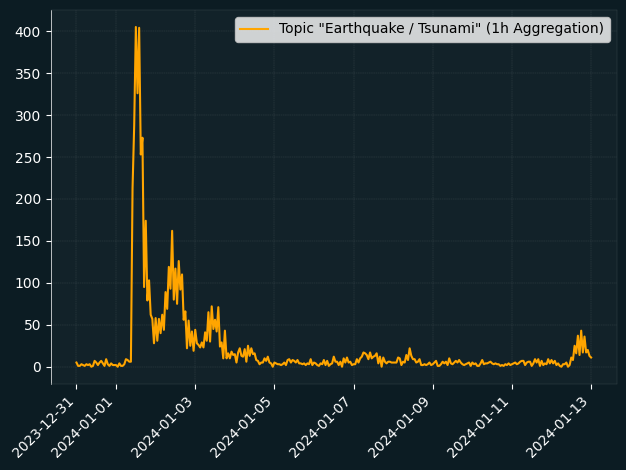

In [15]:
group_disaster = df.groupby(by="date")["topic_information"].apply(
    lambda x: ((x == "Tsunami") | (x == "Earthquake")).sum()).reset_index(
    name="count")

plots(group_disaster["date"], [group_disaster["count"]], plot_type="line", grid="--",
     colors=["orange"], legend=True, legenddata=["Topic \"{}\" (1h Aggregation)".format("Earthquake / Tsunami")])

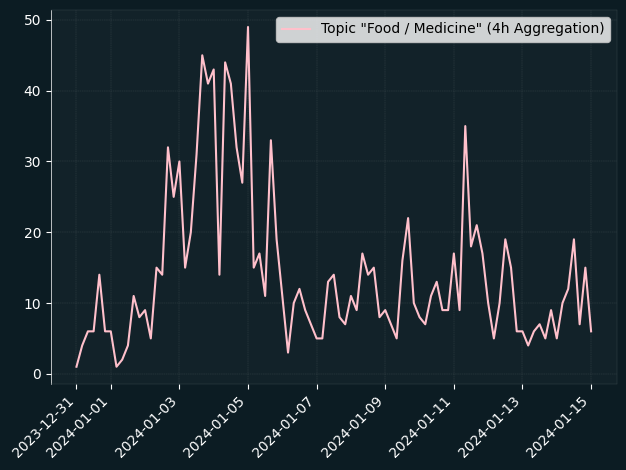

In [16]:
df = pd.concat(dfs)
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d%H%M%S")
df["date"] = df["date"].dt.round('4h')

group_med = df.groupby(by="date")["topic_information"].apply(
    lambda x: ((x == "Food") | (x == "Medicine")).sum()).reset_index(
    name="count")

plots(group_med["date"], [group_med["count"]], plot_type="line", grid="--",
     colors=["pink"], legend=True, legenddata=["Topic \"{}\" (4h Aggregation)".format("Food / Medicine")])

In [96]:
set(custom_topics.values())

{'Anime and Manga',
 'Apple',
 'Architecture',
 'Art',
 'Batteries',
 'Cars',
 'China',
 'Climate',
 'Crime',
 'Crypto',
 'Earthquake',
 'Food',
 'Games',
 'Hadena',
 'Internet Policy',
 'Medicine',
 'Military',
 'Money',
 'Movies',
 'Music',
 'Nasa',
 'New Years Eve',
 'North Korea',
 'Palestine',
 'Pizza',
 'Post Office',
 'Religion',
 'Royalty',
 'Satellites',
 'Space',
 'SpaceX',
 'Sports',
 'Taiwan-China',
 'Travel',
 'Tsunami',
 'US-Elections',
 'Ukraine',
 'Volcanic Eruption',
 'Yemen',
 'spam'}

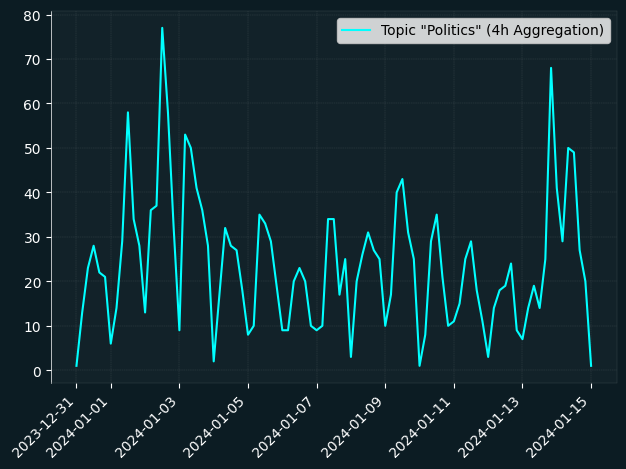

In [17]:
df = pd.concat(dfs)
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d%H%M%S")
df["date"] = df["date"].dt.round('4h')

group_fun = df.groupby(by="date")["topic_information"].apply(
    lambda x: ((x == "Palestine") | (x == "Ukraine") | (x == "Yemen") | (x == "Taiwan-China")).sum()).reset_index(
    name="count")

plots(group_fun["date"], [group_fun["count"]], plot_type="line", grid="--",
     colors=["cyan"], legend=True, legenddata=["Topic \"{}\" (4h Aggregation)".format("Politics")])

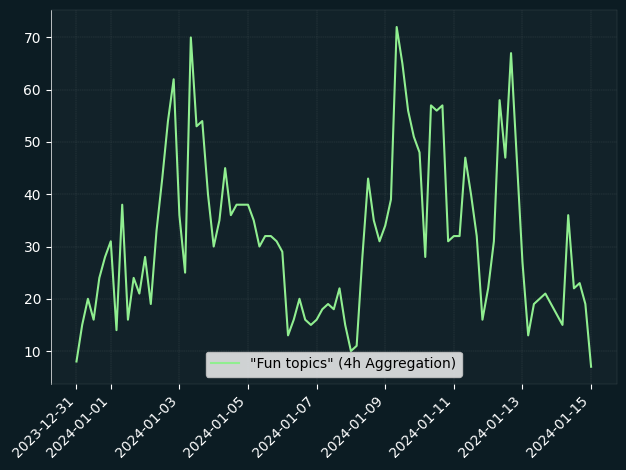

In [18]:
df = pd.concat(dfs)
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d%H%M%S")
df["date"] = df["date"].dt.round('4h')

group_fun = df.groupby(by="date")["topic_information"].apply(
    lambda x: ((x == "Travel") | (x == "Anime and Manga") | (x == "Sport") | (x == "Art") | (x == "Movies") | (x == "Games") | (x == "Cars")).sum()).reset_index(
    name="count")

plots(group_fun["date"], [group_fun["count"]], plot_type="line", grid="--",
     colors=["lightgreen"], legend=True, legenddata=["\"{}\" (4h Aggregation)".format("Fun topics")])

Average reported magnitude: 7.585635359116231


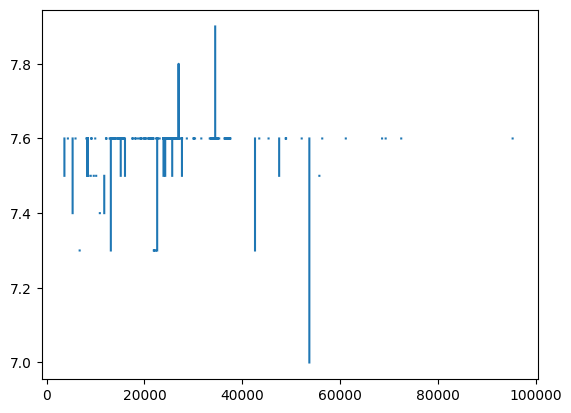

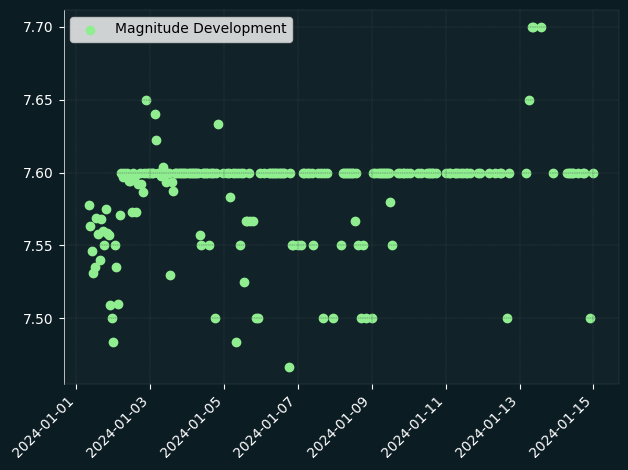

In [85]:
import numpy as np
import re

df = pd.concat(dfs)
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d%H%M%S")
df["date"] = df["date"].dt.round('1h')

# Optional filter by country join table for this
# df = df.loc[df[""] == ""]

pattern = re.compile(r'magnitude 7\.[0-9]')
matched_numbers = []

m = 0
c = 0
for text in df['main_content']:
    match = re.search(pattern, str(text))
    if match:
        matched_numbers.append(float(str(match)[len(str(match)) - 5:len(str(match)) - 2]))
        m += float(str(match)[len(str(match)) - 5:len(str(match)) - 2])
        c += 1
    else:
        matched_numbers.append(np.nan)
print("Average reported magnitude: {}".format(m / c))

df['matched_numbers'] = matched_numbers
plt.plot(matched_numbers)

group_num = df.groupby(by="date")["matched_numbers"].mean().reset_index(name="mean")

plots(group_num["date"], [group_num["mean"]], plot_type="scatter", grid="--",
     colors=["lightgreen"], legend=True, legenddata=["{}".format("Magnitude Development")])
